In [3]:
import tensorflow
import pandas
import matplotlib.pyplot
import sklearn.model_selection

In [6]:
df = pandas.read_csv("train.csv")
X = df[["OverallQual", "GrLivArea", "GarageCars"]]
Y = df["SalePrice"]
for Xlabel in X:
    Xtemp = X[Xlabel]
    xrange = Xtemp.std()
    X[Xlabel] /= xrange
    
yrange = Y.std()
Y /= yrange

C:\Users\Soumi\AppData\Local\Temp\ipykernel_7680\2632086542.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[Xlabel] /= xrange


In [7]:
X.describe()

,OverallQual,GrLivArea,GarageCars
count,1460.000000,1460.000000,1460.000000
mean,4.410217,2.883959,2.364630
std,1.000000,1.000000,1.000000
min,0.723068,0.635609,0.000000
25%,3.615338,2.149462,1.338124
50%,4.338406,2.786022,2.676248
75%,5.061473,3.381192,2.676248
max,7.230676,10.736842,5.352495


In [8]:
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    X, Y, train_size=0.8, test_size=0.2,
)

In [9]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.Input(3),
    tensorflow.keras.layers.Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="adam", loss="mean_squared_error")
history = model.fit(Xtrain, Ytrain, batch_size=1, epochs=30)

Epoch 1/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.8938
Epoch 2/30
1168/1168 [==============================] - 1s 1ms/step - loss: 0.6643
Epoch 3/30
1168/1168 [==============================] - 1s 1ms/step - loss: 0.5246
Epoch 4/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.4279
Epoch 5/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.3702
Epoch 6/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.3325
Epoch 7/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.3077
Epoch 8/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.2912
Epoch 9/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.2848
Epoch 10/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.2804
Epoch 11/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.2762
Epoch 12/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.2748
E

In [11]:
model.evaluate(Xtest, Ytest, batch_size=1)
Ypred = model.predict(Xtest)

10/10 [==============================] - 0s 2ms/step


OverallQual


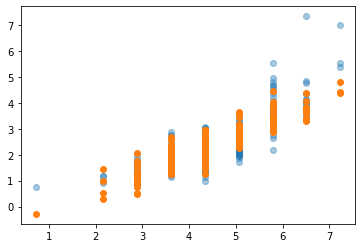

GrLivArea


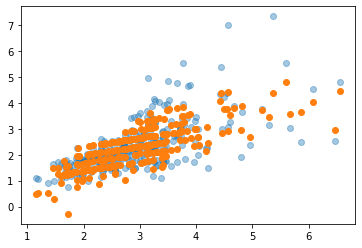

GarageCars


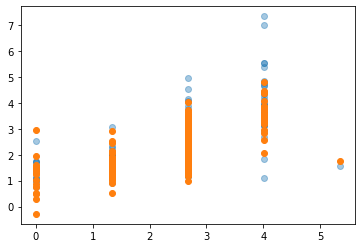

In [13]:
for Xlabel in Xtest:
    print(Xlabel)
    matplotlib.pyplot.scatter(Xtest[Xlabel], Ytest, alpha=0.4)
    matplotlib.pyplot.scatter(Xtest[Xlabel], Ypred)
    matplotlib.pyplot.show()